<a href="https://colab.research.google.com/github/Md-Thahir/AI-Tools-Lab/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
x = [[0, 1], [5, 1], [15, 2], [25, 5], [35, 11],[45, 15], [55, 34], [60, 35]]
y = [4, 5, 20, 14, 32, 22, 38, 43]
x, y = np.array(x), np.array(y)
print(x)
print(y)
x.shape
y.shape

[[ 0  1]
 [ 5  1]
 [15  2]
 [25  5]
 [35 11]
 [45 15]
 [55 34]
 [60 35]]
[ 4  5 20 14 32 22 38 43]


(8,)

In [3]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.8615939258756776
intercept: 5.52257927519819
coefficients: [0.44706965 0.25502548]


In [4]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [5]:
y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 5.77760476  8.012953   12.73867497 17.9744479  23.97529728 29.4660957
 38.78227633 41.27265006]


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
boston_data_frame=pd.read_csv('/content/drive/MyDrive/AI Tools Lab/boston_house_prices.csv')
boston_data_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,36.2


In [7]:
boston_data_frame.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
PRICE      0
dtype: int64

In [8]:
boston_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
 14  PRICE    506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


In [9]:
boston_data_X = boston_data_frame[boston_data_frame.columns[0:13]]
boston_data_Y = boston_data_frame[boston_data_frame.columns[13:14]]
print(boston_data_X)
print(boston_data_Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [10]:
boston_data_X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<Axes: >

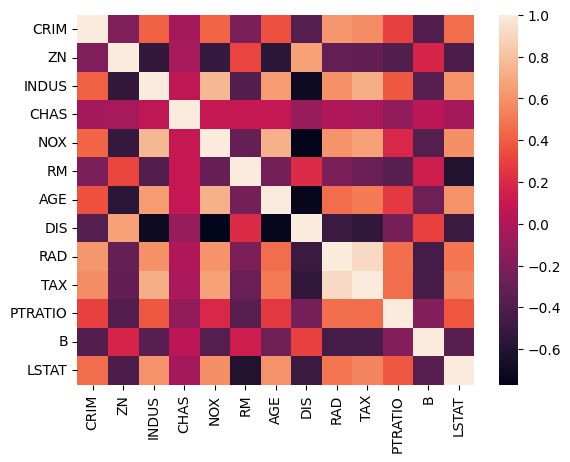

In [11]:
sns.heatmap(boston_data_X.corr())

In [12]:
abs_corr_matrix = boston_data_X.corr().abs()
#print(abs_corr_matrix)
#Select upper triangle of matrix
up_tri=abs_corr_matrix.where(np.triu(np.ones(abs_corr_matrix.shape),k=1).astype(np.bool_))
print(up_tri)
# Find all the features which is having correlation > 0.75 with other features.
correlated_features = [column for column in up_tri.columns if any(up_tri[column] > 0.75)]
#Print correlated_features
print(correlated_features)

         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM      NaN  0.200469  0.406583  0.055892  0.420972  0.219247  0.352734   
ZN        NaN       NaN  0.533828  0.042697  0.516604  0.311991  0.569537   
INDUS     NaN       NaN       NaN  0.062938  0.763651  0.391676  0.644779   
CHAS      NaN       NaN       NaN       NaN  0.091203  0.091251  0.086518   
NOX       NaN       NaN       NaN       NaN       NaN  0.302188  0.731470   
RM        NaN       NaN       NaN       NaN       NaN       NaN  0.240265   
AGE       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
DIS       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
RAD       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
TAX       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
PTRATIO   NaN       NaN       NaN       NaN       NaN       NaN       NaN   
B         NaN       NaN       NaN       NaN       NaN       NaN       NaN   

In [13]:
#Drop correlated features to avoid redundancy
boston_data_X = boston_data_X.drop(correlated_features,
axis=1)
#Divide the data into training and test set. Train set contains 80% of the data. Testset contains 20% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(boston_data_X, boston_data_Y, test_size=0.20)
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X_train,Y_train)

LinearRegression()

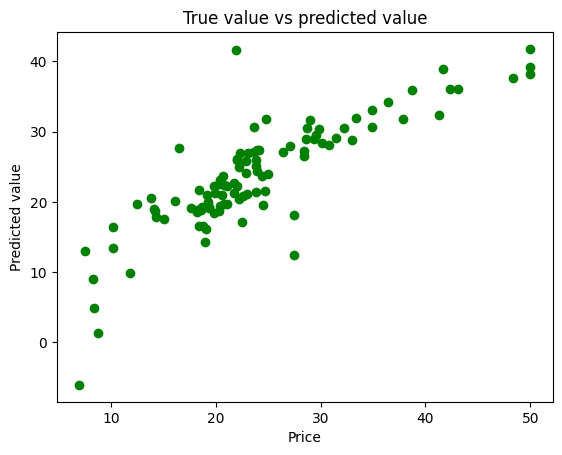

In [14]:
Y_pred = linear_regression.predict(X_test)
plt.scatter(Y_test, Y_pred, c = 'green')
plt.xlabel("Price")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2=r2_score(Y_test, Y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)
#MSE is more sensitive to outliers than MAE because the errors are squared, which means that larger errors have a disproportionately lar
print("R2score : ", r2)

Mean Square Error :  24.238374857475524
Mean Absolute Error :  3.5051385052796316
R2score :  0.7087131309757232
